In [2]:
using Pkg;
Pkg.add("DataFrames")

 Resolving package versions...
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Project.toml`
 [no changes]
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Manifest.toml`
 [no changes]


In [3]:
using DataFrames;

In [5]:
Pkg.add("CSV")
using CSV;

 Resolving package versions...
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Project.toml`
 [no changes]
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Manifest.toml`
 [no changes]


In [6]:
Pkg.add("GLM")
Pkg.add("StatsPlots")
Pkg.add("MLBase")

 Resolving package versions...
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Project.toml`
 [no changes]
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Project.toml`
 [no changes]
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Project.toml`
 [no changes]
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Manifest.toml`
 [no changes]


In [7]:
using DataFrames
using CSV
using Plots

using GLM
using Statistics
using StatsPlots
using MLBase

┌ Info: Recompiling stale cache file C:\Users\ApostlePaul1906\.julia\compiled\v1.2\Plots\ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file C:\Users\ApostlePaul1906\.julia\compiled\v1.2\StatsPlots\SiylL.ji for StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1240


In [12]:
ENV["COLUMNS"] = 1000



1000

In [13]:
df = DataFrame(CSV.File("cps5_small.csv"))
first(df,30)

,black,educ,exper,faminc,female,metro,midwest,south,wage,west
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Int64
1,0,13,45,0,1,1,0,0,44.44,1
2,0,14,25,45351,1,1,1,0,16.0,0
3,0,18,27,91946,1,1,0,0,15.38,0
4,0,13,42,48370,0,1,1,0,13.54,0
5,0,13,41,10000,1,1,0,0,25.0,1
6,0,16,26,151308,1,1,0,0,24.05,0
7,0,16,11,110461,1,1,0,1,40.95,0
8,0,18,15,0,1,1,1,0,26.45,0
9,0,21,32,67084,0,1,1,0,30.76,0


In [11]:
names(df)

10-element Array{String,1}:
 "black"  
 "educ"   
 "exper"  
 "faminc" 
 "female" 
 "metro"  
 "midwest"
 "south"  
 "wage"   
 "west"   

In [14]:
colnames = Symbol[]
for i in string.(names(df))
    push!(colnames,Symbol(replace(replace(replace(strip(i)," " => "_"),"-" => "_"), "/" => "_")))
end

rename!(df, colnames);

In [15]:
colnames

10-element Array{Symbol,1}:
 :black  
 :educ   
 :exper  
 :faminc 
 :female 
 :metro  
 :midwest
 :south  
 :wage   
 :west   

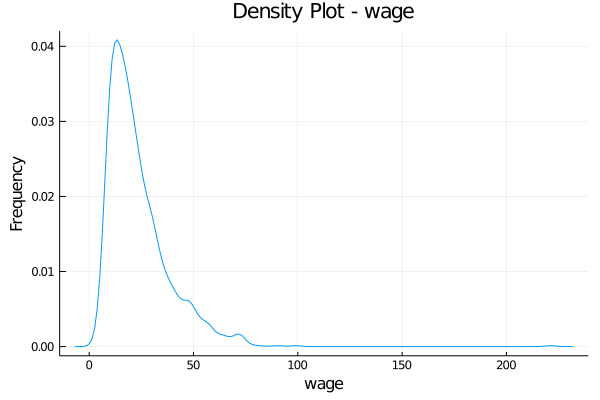

In [16]:
density(df.wage, title = "Density Plot - wage", ylabel = "Frequency", xlabel = "wage", legend = false)

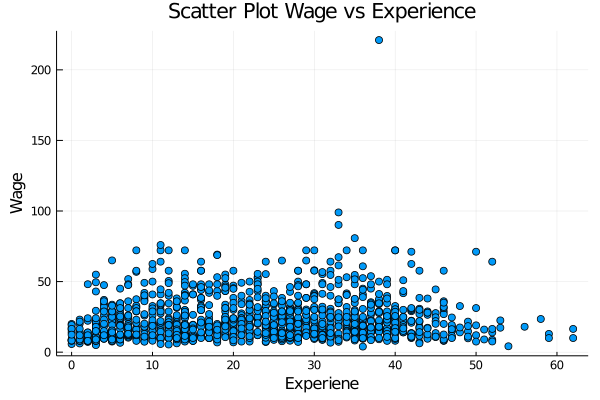

In [17]:
train_plot = scatter(df.exper,df.wage, title = "Scatter Plot Wage vs Experience", ylabel = "Wage", xlabel = "Experiene",legend = false)

In [18]:
Pkg.add("GLM")
using GLM

 Resolving package versions...
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Project.toml`
 [no changes]
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Manifest.toml`
 [no changes]


In [19]:
ols = lm(@formula(wage~ exper), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

wage ~ 1 + exper

Coefficients:
───────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  21.6231      0.887891   24.35    <1e-99  19.8811     23.3651  
exper         0.0862904   0.0330375   2.61    0.0091   0.0214727   0.151108
───────────────────────────────────────────────────────────────────────────

In [32]:
ols = lm(@formula(wage~ exper+metro), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

wage ~ 1 + exper + metro

Coefficients:
───────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  17.3891      1.31646    13.21    <1e-36  14.8062     19.9719  
exper         0.0942019   0.0328463   2.87    0.0042   0.0297591   0.158645
metro         4.92791     1.13812     4.33    <1e-4    2.69497     7.16085 
───────────────────────────────────────────────────────────────────────────

In [33]:
r2(ols)

0.020995572959366715

In [35]:
yhat = predict(ols);

In [36]:
resid = df.wage - yhat;

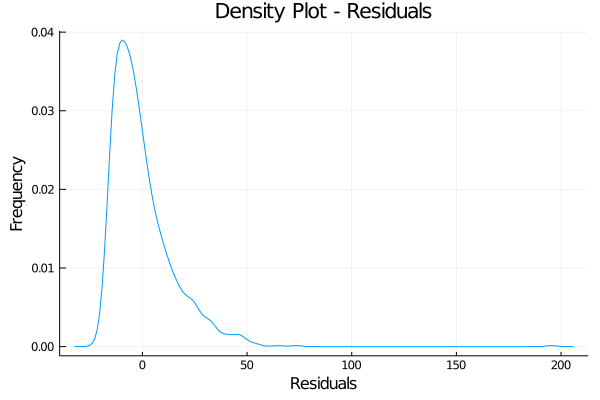

In [37]:
density(resid, title = "Density Plot - Residuals", ylabel = "Frequency", xlabel = "Residuals", legend = false)

In [38]:
Pkg.add("HypothesisTests");
using HypothesisTests;

 Resolving package versions...
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Project.toml`
 [no changes]
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Manifest.toml`
 [no changes]


In [39]:
jbstat = JarqueBeraTest(resid);
jbstat

Jarque-Bera normality test
--------------------------
Population details:
    parameter of interest:   skewness and kurtosis
    value under h_0:         "0 and 3"
    point estimate:          "2.913920459898481 and 27.399966643649275"

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           <1e-99

Details:
    number of observations:         1200
    JB statistic:                   31466.1


In [46]:
Data =  [df.wage df.exper];

In [52]:
for i in 1:length(df.metro);  if df.metro(i) == 1; Data1(i,:) = (Data(i,:)); else Data1(i,:) = []; end

LoadError: syntax: incomplete: "for" at none:1 requires end

In [54]:
length(df.metro)

1200